## Project: Building a handwritten digits classifier

In [10]:
# import libraries
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [11]:
# load UCI data for handwritten digits
train = load_digits()

In [12]:
train.keys()

dict_keys(['images', 'DESCR', 'data', 'target', 'target_names'])

In [13]:
train.data.shape

(1797, 64)

In [14]:
type(train.data)

numpy.ndarray

In [15]:
# convert numpy 2d array to dataframe
df =pd.DataFrame(train.data)

In [16]:
df.shape

(1797, 64)

In [17]:
labels = pd.Series(train.target)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


0


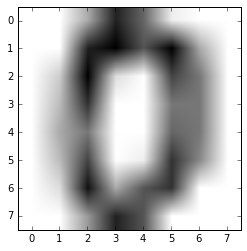

In [19]:
# lets plot first image

img1 = df.iloc[0]
label1 = labels.iloc[0]

print(label1)

plt.imshow(img1.values.reshape(8,8),cmap = 'gray_r')




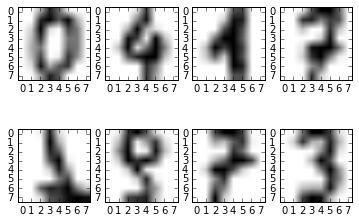

In [21]:
f,ax = plt.subplots(2,4)

ax[0,0].imshow(df.iloc[0].values.reshape(8,8),cmap='gray_r')
ax[0,1].imshow(df.iloc[100].values.reshape(8,8),cmap='gray_r')
ax[0,2].imshow(df.iloc[200].values.reshape(8,8),cmap='gray_r')
ax[0,3].imshow(df.iloc[300].values.reshape(8,8),cmap='gray_r')

ax[1,0].imshow(df.iloc[1000].values.reshape(8,8),cmap='gray_r')
ax[1,1].imshow(df.iloc[1100].values.reshape(8,8),cmap='gray_r')
ax[1,2].imshow(df.iloc[1200].values.reshape(8,8),cmap='gray_r')
ax[1,3].imshow(df.iloc[1300].values.reshape(8,8),cmap='gray_r')


In [22]:
# split data into train,validation

tx,vx,ty,vy = train_test_split(df,labels,test_size = 0.3)



In [23]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [24]:
def train(n_neighbors,tx,ty):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(tx,ty)
    return knn
    

In [25]:
def test(model,vx,vy):
    pred = model.predict(vx)
    acc_score = accuracy_score(vy,pred)
    return acc_score
    

In [26]:
def cross_validate(k):
    fold_accuracies = []
    kf =KFold(n_splits = 4,random_state = 2)
    for train_index,test_index in kf.split(df):
        tf,vf = df.loc[train_index],df.loc[test_index]
        tl,vl = labels.loc[train_index],labels.loc[test_index]
        model = train(k,tf,tl)
        acc = test(model,vf,vl)
        fold_accuracies.append(acc)
    return fold_accuracies


        
    

In [27]:
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)


0.9677233358079684

In [28]:
k_accuracies = []
for i in range(10):
    knn_n_accuracy = cross_validate(i+1)
    k_accuracies.append(np.mean(knn_n_accuracy))
    
    
    
    
    

In [29]:
print(k_accuracies)

[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697, 0.9527097253155159]


In [30]:
plt.plot?

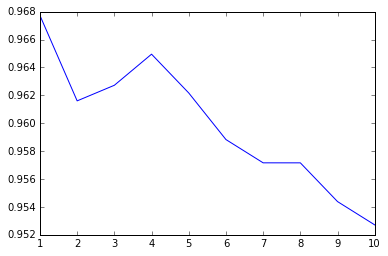

In [31]:
a = range(1,11)
plt.plot(a,k_accuracies)

### Here , we observed that accuracy is highest for n =1 

### Neural Network with single hidden layer

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
def train(num_neuron,tf,tl):
    model = MLPClassifier(hidden_layer_sizes =num_neuron)
    model.fit(tf,tl)
    return model

In [39]:
def test(model,vf,vl):
    pred = model.predict(vf)
    return accuracy_score(vl,pred)
    

In [50]:
def cross_validation(num_neuron):
    kf = KFold(n_splits = 4,random_state=2)
    accuracies = []
    for train_index,valid_index in kf.split(df):
        tf,vf = df.loc[train_index],df.loc[valid_index]
        tl,vl =labels.loc[train_index] , labels.loc[valid_index]
        model = train(num_neuron,tf,tl)
        accuracies.append(test(model,vf,vl))
    return np.mean(accuracies)

acc_8 = cross_validation(8)
print(acc_8)
#print(np.mean(acc_8))
        
            
        
    
    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.8697797574857709


In [51]:
num_neurons = [8,16,32,64,128,256]
acc_neurons = []
for i in num_neurons:
    acc_neurons.append(cross_validation(i))
    
    



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [52]:
acc_neurons

[0.8580908191041821,
 0.9293170007423905,
 0.9259811927740658,
 0.9304355357584756,
 0.9454590447908933,
 0.9476874536005939]

In [54]:
plt.plot?

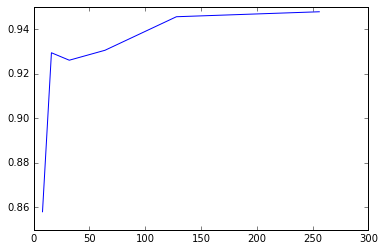

In [56]:
plt.plot(num_neurons,acc_neurons)

### Here , we observed that accuracy has increased after increasing number of neurons . Still , best accuracy is 94% while K nearest neighbor gave 96% so single hidden layer is not very effective.

## Neural Network with 2 hidden layers

In [ ]:

nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    #nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_accuracies)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

### Summary
Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network with 3 hidden layer

In [ ]:
def cross_validate_six(num_neuron):
    kf = KFold(n_splits = 6,random_state=2)
    accuracies = []
    for train_index,valid_index in kf.split(df):
        tf,vf = df.loc[train_index],df.loc[valid_index]
        tl,vl =labels.loc[train_index] , labels.loc[valid_index]
        model = train(num_neuron,tf,tl)
        accuracies.append(test(model,vf,vl))
    return np.mean(accuracies)

In [ ]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    #nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_accuracies)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)    

# Summary
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.